<a href="https://colab.research.google.com/github/geo-tp/053-Database-Frontend/blob/master/multiple_categories_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# DATASET & PREPROCESSING - 11,228 newswires from Reuters, labeled over 46 topics

from keras.utils.np_utils import to_categorical
from keras.datasets import reuters
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  """
  Encoding the integer sequences into a binary matrix
  """
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.

  return results


(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

# Encoding set to binary matrix
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Encoding category
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Devide train set for validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

2110848/2110848 [==============================] - 0s 0us/step


In [7]:
# MODEL DEFINITION - We want to predict the newswire's category

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# TRAIN

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 2s 97ms/step - loss: 2.3152 - accuracy: 0.5214 - val_loss: 1.4805 - val_accuracy: 0.6660
Epoch 2/9
16/16 [==============================] - 1s 83ms/step - loss: 1.3596 - accuracy: 0.6911 - val_loss: 1.2313 - val_accuracy: 0.7000
Epoch 3/9
16/16 [==============================] - 1s 82ms/step - loss: 1.0918 - accuracy: 0.7454 - val_loss: 1.0799 - val_accuracy: 0.7610
Epoch 4/9
16/16 [==============================] - 1s 85ms/step - loss: 0.8948 - accuracy: 0.7938 - val_loss: 1.0040 - val_accuracy: 0.7830
Epoch 5/9
16/16 [==============================] - 1s 85ms/step - loss: 0.7431 - accuracy: 0.8289 - val_loss: 0.9230 - val_accuracy: 0.8110
Epoch 6/9
16/16 [==============================] - 1s 84ms/step - loss: 0.6218 - accuracy: 0.8574 - val_loss: 0.9096 - val_accuracy: 0.8110
Epoch 7/9
16/16 [==============================] - 1s 85ms/step - loss: 0.5245 - accuracy: 0.8802 - val_loss: 0.9149 - val_accuracy: 0.8060
Epoch 8/9
16/16 [===

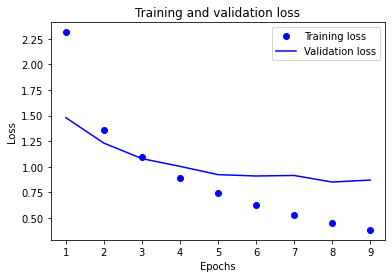

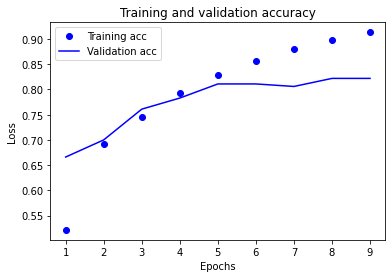

In [9]:
# LOG TRAIN RESULTS

import matplotlib.pyplot as plt

# loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# EVALUATION

score = model.evaluate(x_test, one_hot_test_labels)
print(model.metrics_names)
print(score)

71/71 [==============================] - 0s 5ms/step - loss: 0.9535 - accuracy: 0.7934
['loss', 'accuracy']
[0.9534529447555542, 0.7934104800224304]
